In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading data

In [3]:
df = pd.read_csv('ab_browser_test.csv')
df.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


# Task 1

In [4]:
df['slot'].value_counts()

control    284554
exp        281580
Name: slot, dtype: int64

In [5]:
a = df[df['slot'] == 'exp']['n_clicks'].sum() - df[df['slot'] == 'control']['n_clicks'].sum()
b = a/df[df['slot'] == 'control']['n_clicks'].sum()
round(b*100,3)

1.614

# Task 2

In [11]:
df_c = np.array(df[df['slot'] == 'control']['n_clicks'])
df_exp = np.array(df[df['slot'] == 'exp']['n_clicks'])

In [12]:
np.random.seed(0)

In [6]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [8]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [35]:
c_boot = get_bootstrap_samples(df_c, 1000)
exp_boot = get_bootstrap_samples(df_exp, 1000)

**Mean**

In [36]:
c_mean_score = list(map(np.mean, c_boot))
exp_mean_score = list(map(np.mean, exp_boot))

In [37]:
delta_mean_scores = list(map(lambda x: x[0] - x[1], zip(c_mean_score, exp_mean_score)))

In [38]:
print("95% confidence interval for the difference between medians",  stat_intervals(delta_mean_scores, 0.05))

95% confidence interval for the difference between medians [-0.40606655 -0.20228123]


round(stat_intervals(delta_mean_scores, 0.05)[0],4)

**Median**

strange interval

In [39]:
c_med_score = list(map(np.median, c_boot))
exp_med_score = list(map(np.median, exp_boot))

In [40]:
delta_med_scores = list(map(lambda x: x[0] - x[1], zip(c_med_score, exp_med_score)))

In [41]:
print("95% confidence interval for the difference between medians",  stat_intervals(delta_med_scores, 0.05))

95% confidence interval for the difference between medians [-1. -1.]


# Task 4

In [45]:
from scipy.stats import probplot

In [43]:
n_boot_samples = 500
c_boot = get_bootstrap_samples(df_c, n_boot_samples)

In [72]:
means = c_boot.mean(axis=1)
delta = c_boot - means[:, np.newaxis]

control_boot_chi_squared = np.sum(delta**2, axis=1)

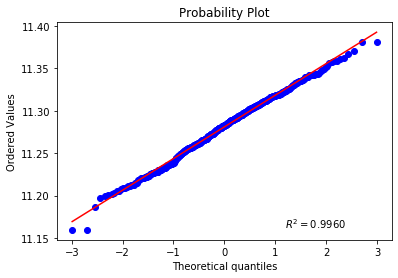

In [80]:
probplot(means, plot=plt, rvalue=True);

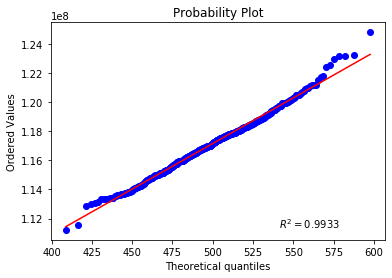

In [84]:
n = 500-1
probplot(control_boot_chi_squared, dist='chi2', sparams=(n-1), plot=plt, rvalue=True);

# Task 5

In [85]:
from scipy import stats

In [89]:
stats.mannwhitneyu(df_c, df_exp)

MannwhitneyuResult(statistic=38940590204.0, pvalue=3.1236179006848145e-75)

In [98]:
stats.mannwhitneyu(df_c, df_exp)[1]

3.1236179006848145e-75

# Task 6

In [91]:
import statsmodels.stats.multitest as smm
from statsmodels.sandbox.stats.multicomp import multipletests

In [100]:
pvalues = []
for browser in df['browser'].unique():
    df_exp = df[(df['slot']=='exp') & (df['browser']==browser)]['n_clicks']
    df_c = df[(df['slot']=='control') & (df['browser']==browser)]['n_clicks']
    pvalues.append(stats.mannwhitneyu(df_c, df_exp)[1])

In [102]:
reject, p_cor, a1, a2 = multipletests(pvalues, alpha=0.05, method='holm')

In [105]:
reject #answer = 5 (False count)

array([False, False,  True, False, False, False])

# Task 7

In [112]:
noncl = []
for browser in df['browser'].unique():
    a = df[(df['slot']=='control') & (df['browser']==browser)]['n_nonclk_queries'].sum()
    b = df[(df['slot']=='control') & (df['browser']==browser)]['n_queries'].sum()
    c = a/b*100
    
    a = df[(df['slot']=='exp') & (df['browser']==browser)]['n_nonclk_queries'].sum()
    b = df[(df['slot']=='exp') & (df['browser']==browser)]['n_queries'].sum()
    exp = a/b*100    
    noncl.append([c, exp])

In [113]:
noncl

[[45.96274717919465, 44.982746948554706],
 [46.97092963514274, 45.14294190358467],
 [57.59041136008114, 43.755617361273295],
 [36.29936674628208, 36.93741284866483],
 [40.540484743383296, 38.97737648371716],
 [40.593976593513354, 39.85394721969546]]